import

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from compare_gf3_defo_map.main import read_geotiff, imshow_geotiff, compare_geotiff, plot_compare_geotiff

read

In [112]:
# read
reference= read_geotiff('../tests/data/aligned/gf3_dsc_aligned_s1_asc.tif')
comparate = read_geotiff('../tests/data/aligned/s1_asc_aligned_gf3_dsc.tif')

plot

In [ ]:
# plot a 2d image array
imshow_geotiff(reference)

In [ ]:
imshow_geotiff(comparate)

In [ ]:
imshow_geotiff(reference - comparate, vlim=0.01)


Compare: pre-process

In [113]:
ref, comp = compare_geotiff(reference, comparate)

Plot comparison

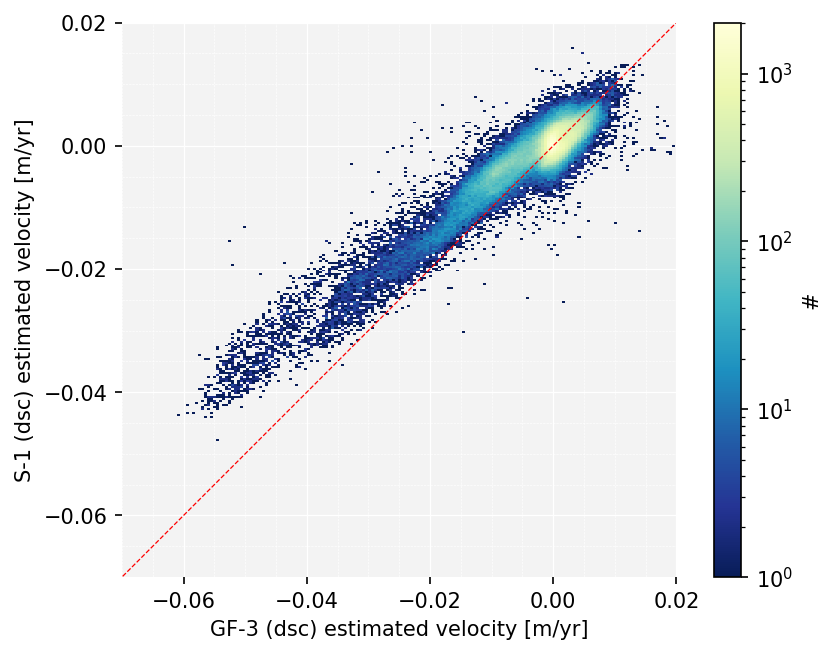

In [114]:
# from matplotlib.markers import MarkerStyle
from matplotlib import colors


# ------------------ 2D Histogram ------------------
# Basemap
fig, ax = plt.subplots()
ax.set_facecolor(color='#F3F3F3')
[ax.spines[side].set_visible(False) for side in ax.spines]

plt.rcParams['figure.dpi'] = 150

# baseline: y=x
ax.plot([-1,1], [-1, 1], color='red', linestyle='--', linewidth=0.6, zorder = 12)

# hist2d
h = ax.hist2d(ref, comp, bins=200, norm=colors.LogNorm(), zorder=10, cmap = "YlGnBu_r")
ax.set_xlim([-0.07, 0.02])
ax.set_ylim([-0.07, 0.02])

# colorbar
cbar = fig.colorbar(h[3], ax=ax)
# add a title for the colorbar
cbar.ax.set_ylabel('#')

# labels
# ax.set_title('Comparison of GF-3 and S-1 estimated velocities')
ax.set_xlabel('GF-3 (dsc) estimated velocity [m/yr]')
ax.set_ylabel('S-1 (dsc) estimated velocity [m/yr]')

# Style the Grid
ax.grid(which='major', color='white', linewidth=0.6)
ax.grid(which='minor', color='white', linewidth=0.3, linestyle='--')
ax.minorticks_on()
ax.tick_params(which='minor', length=0)  # do not show the minor ticks
plt.gca().set_aspect(1., adjustable='box')
ax.set_axisbelow(True)  # hide grid

plt.show()

In [117]:
# Linear Regression
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

comp, ref = ref, comp

# scipy linear regression
slope, intercept, r_value, p_value, std_err = linregress(ref, comp)
comp_pred = intercept + slope * ref

mse = mean_squared_error(y_true=comp, y_pred=comp_pred, squared=True)
rmse = mean_squared_error(y_true=comp, y_pred=comp_pred, squared=False)

print('scipy intercept: {:.6f}'.format(intercept))
print('scipy slope: {:.6f}'.format(slope))
print('scipy MSE: {:.6f}'.format(mse))
print('scipy RMSE: {:.6f}'.format(rmse))
print('scipy R2: {:.6f}'.format(r_value**2))

# sklearn linear regression
reg = LinearRegression().fit(ref.reshape(- 1, 1), comp)
comp_pred = reg.predict(ref.reshape(- 1, 1))

mse = mean_squared_error(y_true=comp, y_pred=comp_pred, squared=True)
rmse = mean_squared_error(y_true=comp, y_pred=comp_pred, squared=False)
r_squared = reg.score(ref.reshape(- 1, 1), comp)

print('sklearn intercept: {:.6f}'.format(reg.intercept_))
print('sklearn slope: {:.6f}'.format(reg.coef_[0]))
print('sklearn MSE: {:.6f}'.format(mse))
print('sklearn RMSE: {:.6f}'.format(rmse))
print('sklearn R2: {:.6f}'.format(r_squared))

scipy intercept: 0.000359
scipy slope: 0.671731
scipy MSE: 0.000004
scipy RMSE: 0.001908
scipy R2: 0.833299
sklearn intercept: 0.000359
sklearn slope: 0.671731
sklearn MSE: 0.000004
sklearn RMSE: 0.001908
sklearn R2: 0.833299


/Users/yuxiao/.virtualenvs/potato/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/yuxiao/.virtualenvs/potato/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/yuxiao/.virtualenvs/potato/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/yuxiao/.virtualenvs/potato/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.